# Capstone 2: Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv('tree.csv', usecols = ['tree_id', 'tree_dbh', 'curb_loc', 'health', 'spc_common', 'steward',
       'guards', 'sidewalk','problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'borough', 'latitude', 'longitude'])
data = data.dropna(subset=['health'])

## Explore numeric variable

In [3]:
# Check shape
data.shape

(652172, 21)

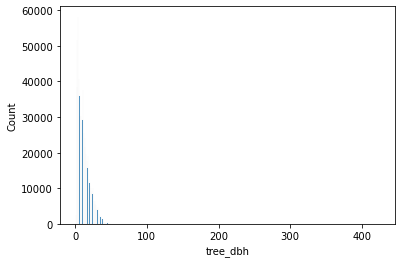

In [4]:
# Check numeric variable tree_dbh
sns.histplot(x='tree_dbh', data=data)
plt.show()

In [5]:
# Check tail of the histogram
data.tree_dbh.sort_values(ascending=False).head(10)

2405      425
180962    389
201195    318
270493    318
227057    298
457612    293
187388    291
29973     282
681736    281
439083    266
Name: tree_dbh, dtype: int64

* Outliers with large dbh values

In [6]:
# Determine the number of possible outliers
len(data[data.tree_dbh > 50])

361

* Drop values > 50

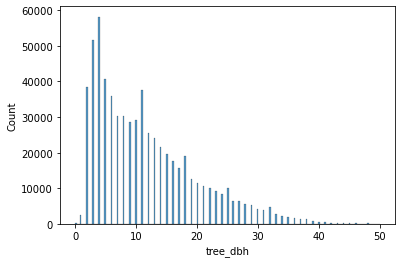

In [7]:
# Recheck distribution
data = data[data.tree_dbh <= 50]
sns.histplot(x='tree_dbh', data=data)
plt.show()

## Explore categorical variables

In [8]:
# Check curb location
data.curb_loc.value_counts()

OnCurb            625993
OffsetFromCurb     25818
Name: curb_loc, dtype: int64

* Imbalanced category
* Possibly drop this column if no predictive power?

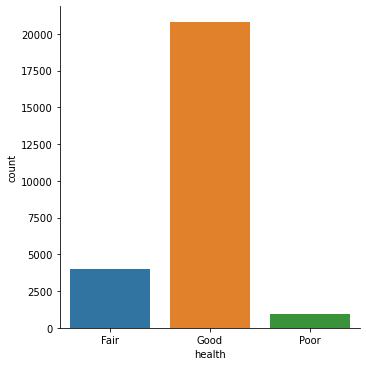

In [9]:
sns.catplot(x=data[data.curb_loc == 'OffsetFromCurb'].health, kind='count', data=data)

None       487511
1or2       143510
3or4        19180
4orMore      1610
Name: steward, dtype: int64

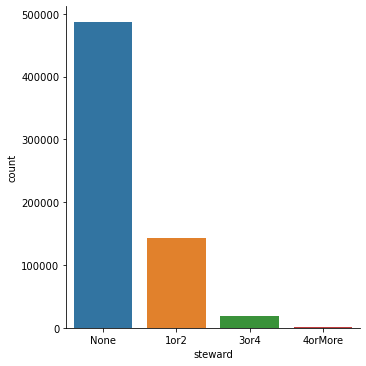

In [10]:
# Check number of stewards
sns.catplot(x='steward', kind='count', data=data)
data.steward.value_counts()

None       571960
Helpful     51856
Harmful     20247
Unsure       7747
Name: guards, dtype: int64

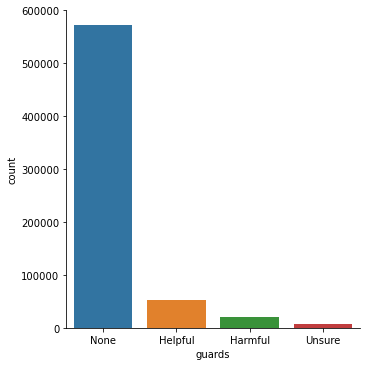

In [11]:
# Check guards
sns.catplot(x='guards', kind='count', data=data)
data.guards.value_counts()

In [12]:
# Check sidewalk 
data.sidewalk.value_counts()

NoDamage    464750
Damage      187060
Name: sidewalk, dtype: int64

In [13]:
# Check problems 
data.problems.value_counts()

None                                                                                               426087
Stones                                                                                              95590
BranchLights                                                                                        29435
Stones,BranchLights                                                                                 17793
RootOther                                                                                           11411
                                                                                                    ...  
TrunkLights,BranchLights,Sneakers                                                                       1
Stones,RootOther,TrunkLights,BranchLights,BranchOther                                                   1
Stones,MetalGrates,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,Sneakers,BranchOther         1
Stones,RootOther,Sneakers,BranchOther         

In [14]:
data.problems.nunique()

232

* The many unique problems are broken up into the following binary columns: 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'

In [15]:
# Check boroughs
data.borough.value_counts()

Queens           237806
Brooklyn         169682
Staten Island    101359
Bronx             80547
Manhattan         62417
Name: borough, dtype: int64

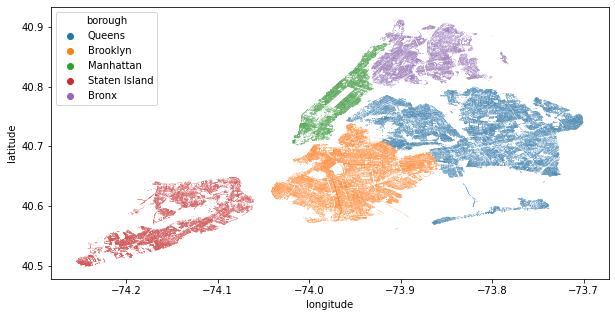

In [16]:
# Check latitude and longitude
# Approximate map by plotting boroughs
plt.figure(figsize = (10, 5))
sns.scatterplot(x='longitude', y='latitude', data=data, s=0.05, hue='borough')
plt.show()

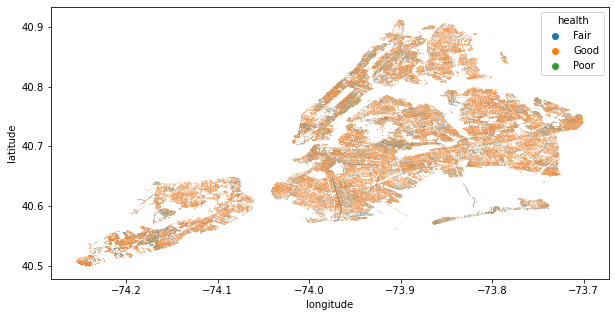

In [17]:
# Check geographical distribution of tree health 
plt.figure(figsize = (10, 5))
sns.scatterplot(x='longitude', y='latitude', data=data, s=0.05, hue='health')
plt.show()

### QUESTIONS
* Should I do more analysis by borough?
* The Guided Capstone EDA section goes through PCA for the many numeric variables in the dataset; with only one numeric variable in this dataset, is there something similar I can do? I don't think I understand the function of PCA conceptually  
* I'm not sure what to explore further for the categorical variables since I can't do correlation heatmaps, histograms, or summary statistics, etc. Are there other things I should be exploring in this section? 